In [1]:
import cv2
import numpy as np
import sys
import matplotlib.pyplot as plt
import pylab


In [2]:
# impotar imagen
# =====================================
img = cv2.imread('lena.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
img.shape

(186, 271, 3)

In [4]:

def grafic(img,img2):
    fig, axs = plt.subplots(1,2, figsize=(35, 10))
    fig.suptitle("imagen original vs convolucion",fontsize=35)
    color = ('b', 'g', 'r') 
    axs[0].set_title('Original',fontsize=20)
    axs[0].imshow(img, origin='upper')
    axs[1].set_title('Convolucion',fontsize=20)
    axs[1].imshow(img2, origin='upper')
    plt.show()
    return(None)

def convolve(img, fil, mode = 'same'): # Extrae tres canales por separado
    if mode == 'fill':
        h = fil.shape[0] // 2
        w = fil.shape[1] // 2
        img = np.pad(img, ((h, h), (w, w),(0, 0)), 'constant')
        conv_b = _convolve (img [:,:, 0], fil) # luego vaya a la operación de convolución
    conv_g = _convolve(img[:,:,1],fil)
    conv_r = _convolve(img[:,:,2],fil)
    dstack = np.dstack ([conv_b, conv_g, conv_r]) # Combinar los tres canales después de la convolución
    return dstack #Return the result after convolution

def _convolve(img,fil): 
    fil_heigh = fil.shape [0] #Obtén la altura del núcleo de convolución (filtro)
    fil_width = fil.shape [1] #Obtén el ancho del núcleo de convolución (filtro)
    conv_heigh = img.shape [0] -fil.shape [0] + 1 #Determine el tamaño del resultado de convolución
    conv_width = img.shape[1] - fil.shape[1] + 1
    conv = np.zeros((conv_heigh,conv_width),dtype = 'uint8')
    
    for i in range(conv_heigh):      
        for j in range(conv_width): # Multiplica por punto y suma para obtener cada punto
            conv[i][j] = wise_element_sum(img[i:i + fil_heigh,j:j + fil_width ],fil)
    return conv
   
def wise_element_sum(img,fil):
    res = (img * fil).sum() 
    if(res < 0):
        res = 0
    elif res > 255:
        res  = 255
    return res

In [10]:
# kernel
fil = np.array([[-1,-1,-1, 0, 1],
                [-1,-1, 0, 1, 1],
                [-1, 0, 1, 1, 1]])
kernel_borde1=np.array([[0,1,0],[1,-4,1],[0,1,0]])

In [11]:
res = convolve(img,kernel_borde1,'fill')

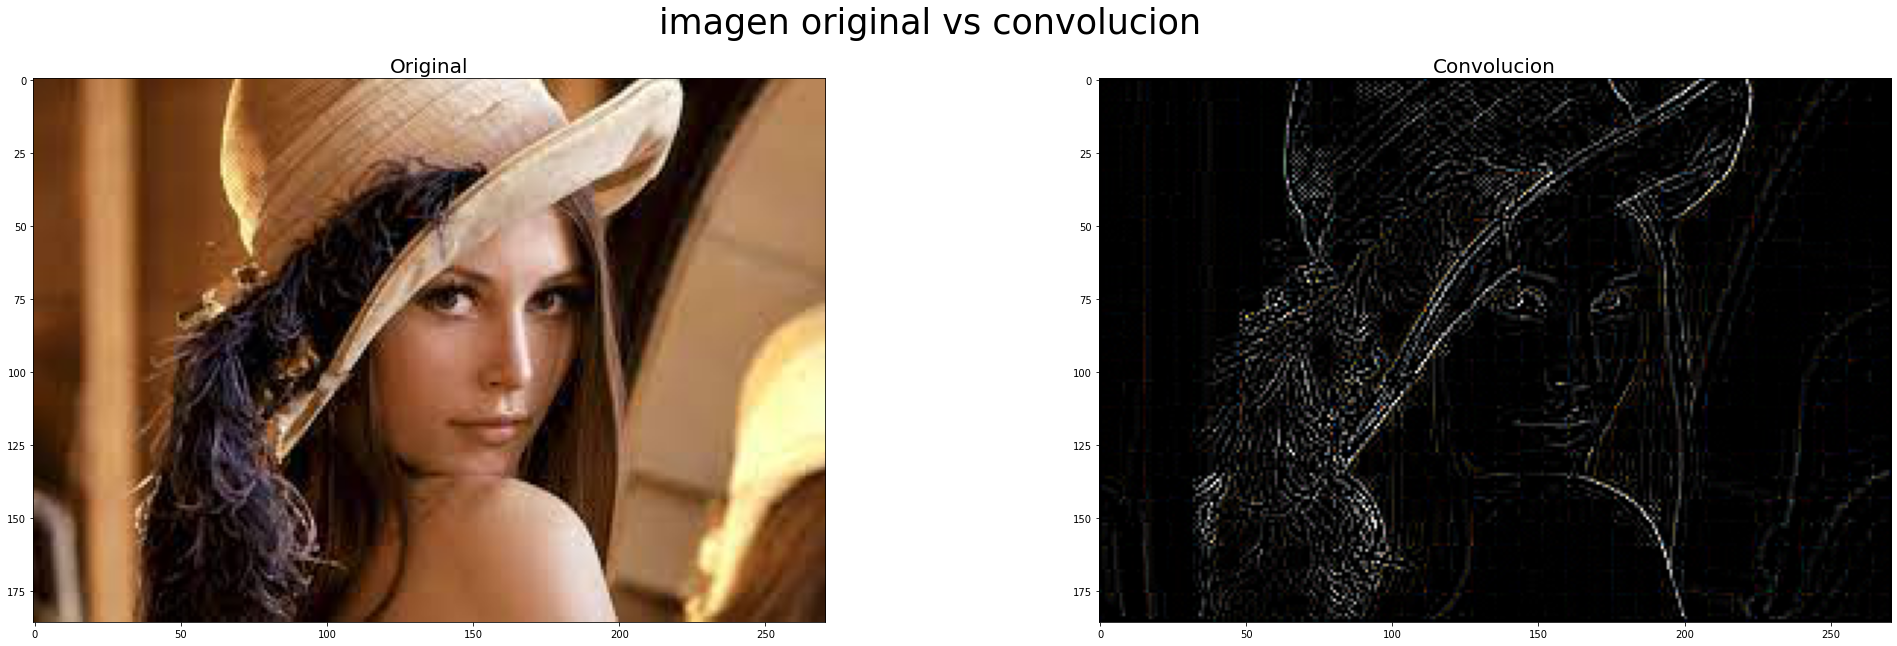

In [12]:
grafic(img,res)